# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the data

In [2]:
df=pd.read_csv("pizza_sales.csv")
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Data analysis

In [3]:
df.shape

(48620, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [6]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Feature Engineering:

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')
df['order_date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: order_date, dtype: datetime64[ns]

In [9]:
df['order_date'].unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-01-02 00:00:00', '2015-01-03 00:00:00',
 '2015-01-04 00:00:00', '2015-01-05 00:00:00', '2015-01-06 00:00:00',
 '2015-01-07 00:00:00', '2015-01-08 00:00:00', '2015-01-09 00:00:00',
 '2015-01-10 00:00:00',
 ...
 '2015-12-21 00:00:00', '2015-12-22 00:00:00', '2015-12-23 00:00:00',
 '2015-12-24 00:00:00', '2015-12-26 00:00:00', '2015-12-27 00:00:00',
 '2015-12-28 00:00:00', '2015-12-29 00:00:00', '2015-12-30 00:00:00',
 '2015-12-31 00:00:00']
Length: 358, dtype: datetime64[ns]

# Creating a new dataframe

In [10]:
new_df=df.copy()

In [11]:
new_df['order_year']=df['order_date'].dt.year
new_df['order_year'].unique()

array([2015])

In [12]:
new_df['order_month']=df['order_date'].dt.month
new_df['order_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
import calendar

new_df['order_month_name']=new_df['order_month'].apply(lambda x:calendar.month_name[x])
new_df['order_month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [14]:
new_df['order_week']=df['order_date'].dt.day_name()
new_df['order_week'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [15]:
new_df['order_day']=df['order_date'].dt.day
new_df['order_day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [16]:
# Convert to datetime, focusing only on the time
new_df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
new_df['order_time'].head()

0   2024-12-26 11:38:36
1   2024-12-26 11:57:40
2   2024-12-26 11:57:40
3   2024-12-26 11:57:40
4   2024-12-26 11:57:40
Name: order_time, dtype: datetime64[ns]

In [17]:
new_df['order_hour'] = new_df['order_time'].dt.hour
new_df['order_hour'].head()

0    11
1    11
2    11
3    11
4    11
Name: order_hour, dtype: int32

In [18]:
new_df['order_minute']=new_df['order_time'].dt.minute
new_df['order_minute'].head()

0    38
1    57
2    57
3    57
4    57
Name: order_minute, dtype: int32

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  order_year         48620 non-null  int32         
 13  order_month        48620 non-null  int32         
 14  order_

In [20]:
print('df length :',len(df.columns),'columns')
print('new_df length :',len(new_df.columns),'columns')

df length : 12 columns
new_df length : 19 columns


# changing the column order

In [21]:
columns_order = [
    'order_id','order_year', 'order_month','order_month_name','order_week','order_day', 'order_hour', 'order_minute',
    'pizza_id', 'pizza_name_id', 'pizza_name', 'pizza_category', 'pizza_size',
    'pizza_ingredients', 'quantity', 'unit_price', 'total_price'
]

new_df = new_df[columns_order]
new_df.head(2)

,order_id,order_year,order_month,order_month_name,order_week,order_day,order_hour,order_minute,pizza_id,pizza_name_id,pizza_name,pizza_category,pizza_size,pizza_ingredients,quantity,unit_price,total_price
0,1,2015,1,January,Thursday,1,11,38,1,hawaiian_m,The Hawaiian Pizza,Classic,M,"Sliced Ham, Pineapple, Mozzarella Cheese",1,13.25,13.25
1,2,2015,1,January,Thursday,1,11,57,2,classic_dlx_m,The Classic Deluxe Pizza,Classic,M,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",1,16.00,16.00


# Sales Analysis

## Pizza Sales by Category

In [22]:
sales_by_category = new_df.groupby('pizza_category').agg(
    total_revenue=('total_price', 'sum'),
    total_quantity=('quantity', 'sum')
).reset_index()


In [23]:
sales_by_category

,pizza_category,total_revenue,total_quantity
0,Chicken,195919.50,11050
1,Classic,220053.10,14888
2,Supreme,208197.00,11987
3,Veggie,193690.45,11649


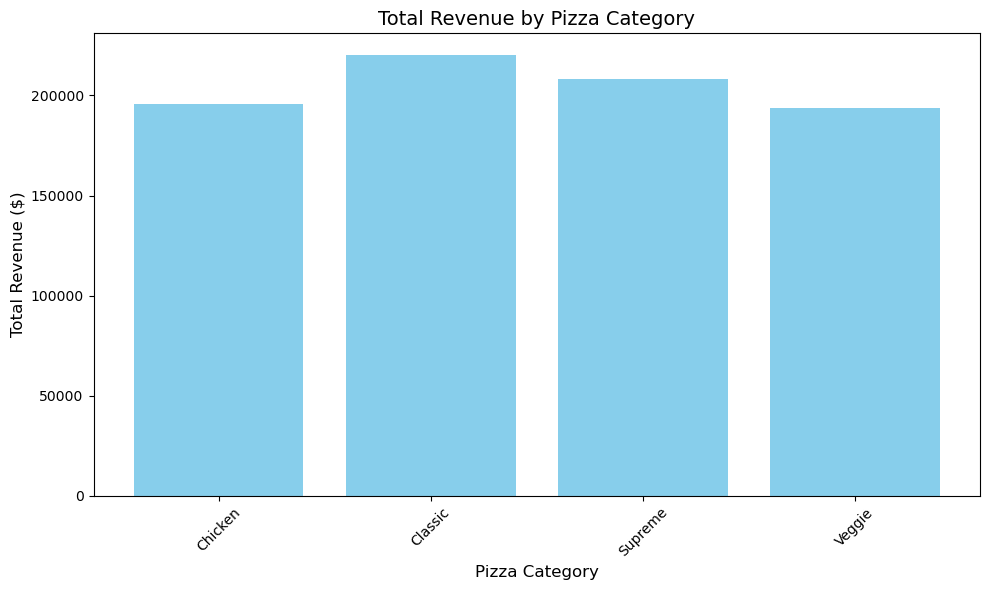

In [24]:
# Plotting Total Revenue by Pizza Category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['pizza_category'], sales_by_category['total_revenue'], color='skyblue')
plt.title('Total Revenue by Pizza Category', fontsize=14)
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

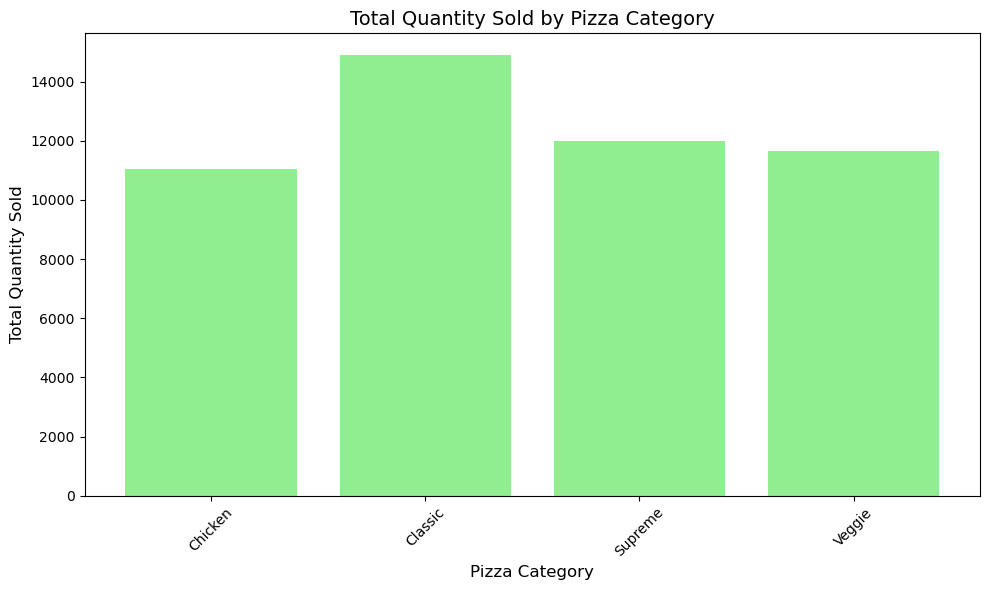

In [25]:
# Plotting Total Quantity by Pizza Category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['pizza_category'], sales_by_category['total_quantity'], color='lightgreen')
plt.title('Total Quantity Sold by Pizza Category', fontsize=14)
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
new_df.groupby('pizza_size')['total_price'].sum()

pizza_size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

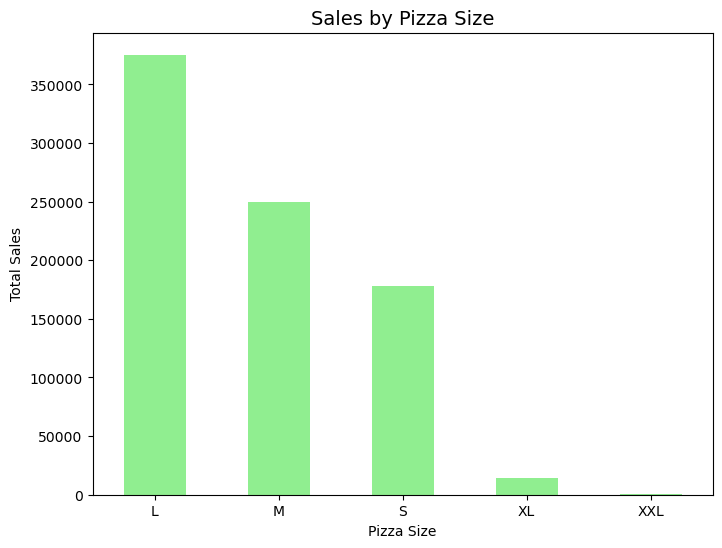

In [27]:
# Group by pizza size to calculate total sales
sales_by_size = new_df.groupby('pizza_size')['total_price'].sum()

# Plot sales by pizza size
plt.figure(figsize=(8, 6))
sales_by_size.plot(kind='bar', color='lightgreen')
plt.title('Sales by Pizza Size', fontsize=14)
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

## Top-Selling Pizzas

In [28]:
top_selling_pizzas = df.groupby('pizza_name').agg(
    total_revenue=('total_price', 'sum'),
    total_quantity=('quantity', 'sum')
).reset_index()


top_selling_pizzas

,pizza_name,total_revenue,total_quantity
0,The Barbecue Chicken Pizza,42768.00,2432
1,The Big Meat Pizza,22968.00,1914
2,The Brie Carre Pizza,11588.50,490
3,The Calabrese Pizza,15934.25,937
4,The California Chicken Pizza,41409.50,2370
5,The Chicken Alfredo Pizza,16900.25,987
6,The Chicken Pesto Pizza,16701.75,973
7,The Classic Deluxe Pizza,38180.50,2453
8,The Five Cheese Pizza,26066.50,1409
9,The Four Cheese Pizza,32265.70,1902


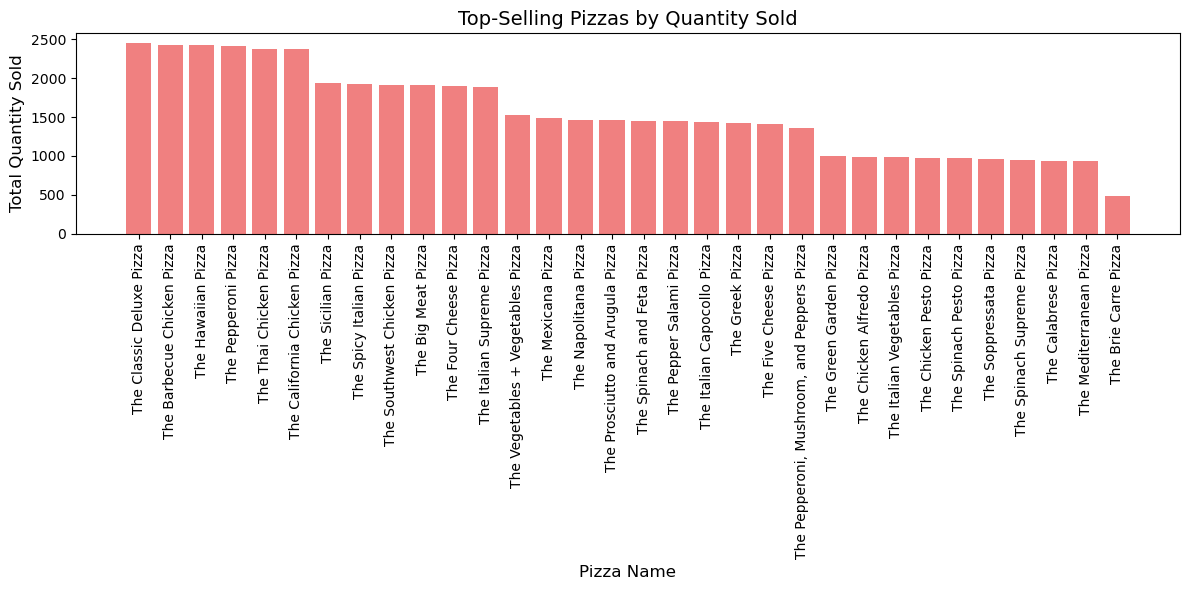

In [29]:
# Sort the pizzas by total quantity sold (in descending order)
top_selling_pizzas_sorted = top_selling_pizzas.sort_values(by='total_quantity', ascending=False)

# Plotting Top-Selling Pizzas by Total Quantity
plt.figure(figsize=(12, 6))
plt.bar(top_selling_pizzas_sorted['pizza_name'], top_selling_pizzas_sorted['total_quantity'], color='lightcoral')
plt.title('Top-Selling Pizzas by Quantity Sold', fontsize=14)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

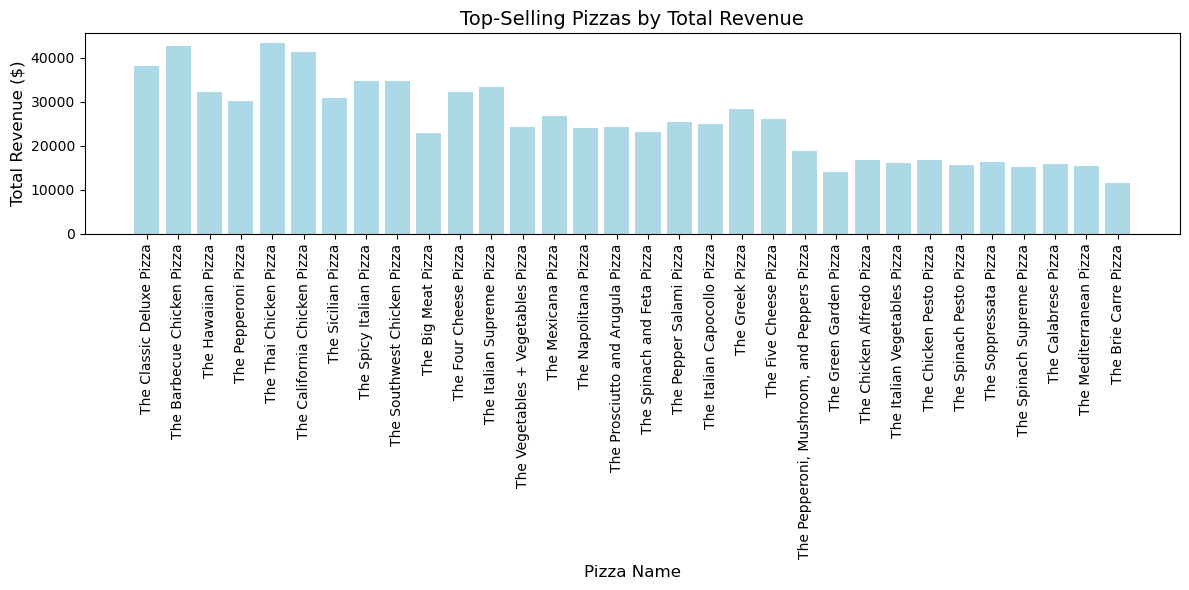

In [30]:
# Plotting Top-Selling Pizzas by Total Revenue
plt.figure(figsize=(12, 6))
plt.bar(top_selling_pizzas_sorted['pizza_name'], top_selling_pizzas_sorted['total_revenue'], color='lightblue')
plt.title('Top-Selling Pizzas by Total Revenue', fontsize=14)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Revenue Distribution by Pizza Category

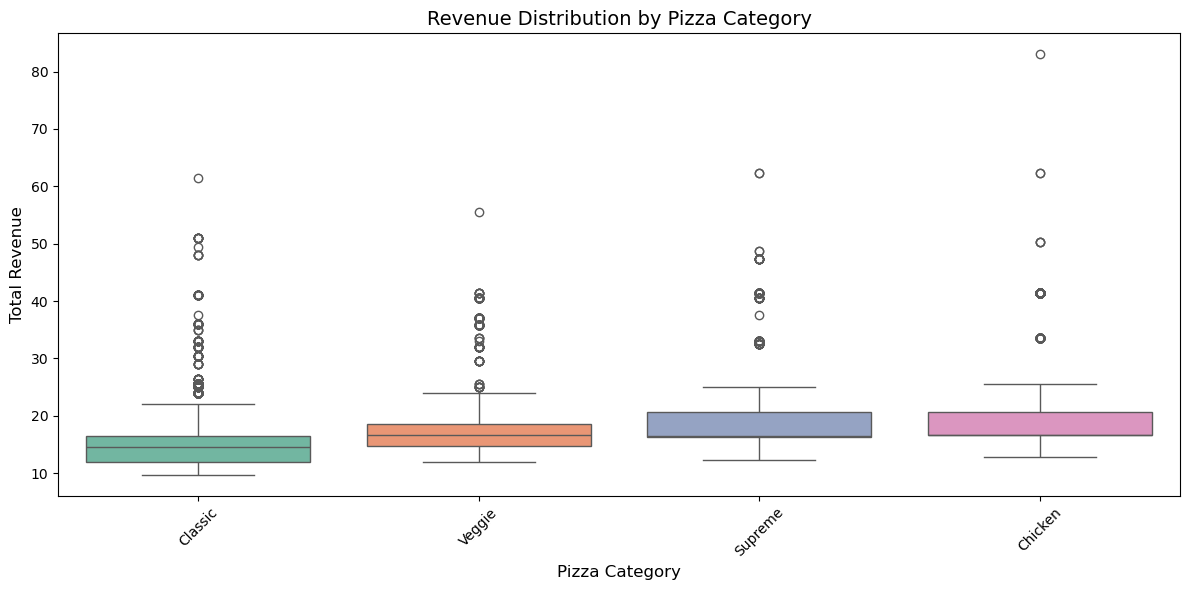

In [31]:
import seaborn as sns

# Plotting the revenue distribution by pizza category
plt.figure(figsize=(12, 6))
sns.boxplot(x='pizza_category', y='total_price', data=df, palette="Set2", hue='pizza_category')
plt.title('Revenue Distribution by Pizza Category', fontsize=14)
plt.xlabel('Pizza Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time-Based Trends

## Sales Trends by Month

In [32]:
new_df.groupby('order_month_name').agg(total_revenue=('total_price', 'sum')).reset_index()

,order_month_name,total_revenue
0,April,68736.80
1,August,68278.25
2,December,64701.15
3,February,65159.60
4,January,69793.30
5,July,72557.90
6,June,68230.20
7,March,70397.10
8,May,71402.75
9,November,70395.35


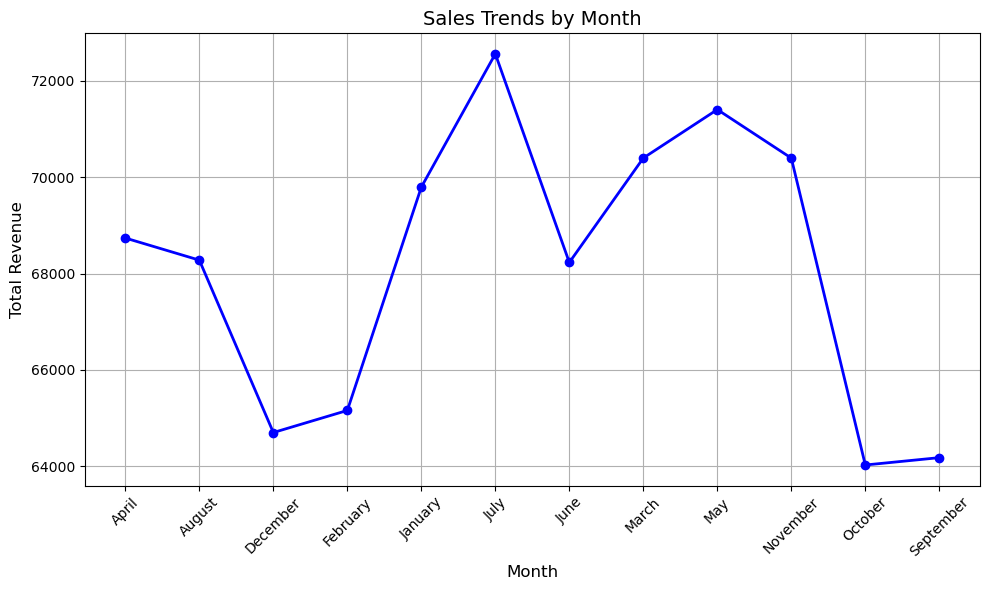

In [33]:
# Group by 'order_month' (or 'order_month_name' if you prefer month names)
sales_by_month = new_df.groupby('order_month_name').agg(total_revenue=('total_price', 'sum')).reset_index()

# Plotting Sales Trends by Month
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month['order_month_name'], sales_by_month['total_revenue'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Sales Trends by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=90)
plt.xticks(sales_by_month['order_month_name'], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [34]:
new_df.groupby('order_week').agg(total_revenue=('total_price', 'sum')).reset_index()

,order_week,total_revenue
0,Friday,136073.90
1,Monday,107329.55
2,Saturday,123182.40
3,Sunday,99203.50
4,Thursday,123528.50
5,Tuesday,114133.80
6,Wednesday,114408.40


## Weekly Sales Patterns:

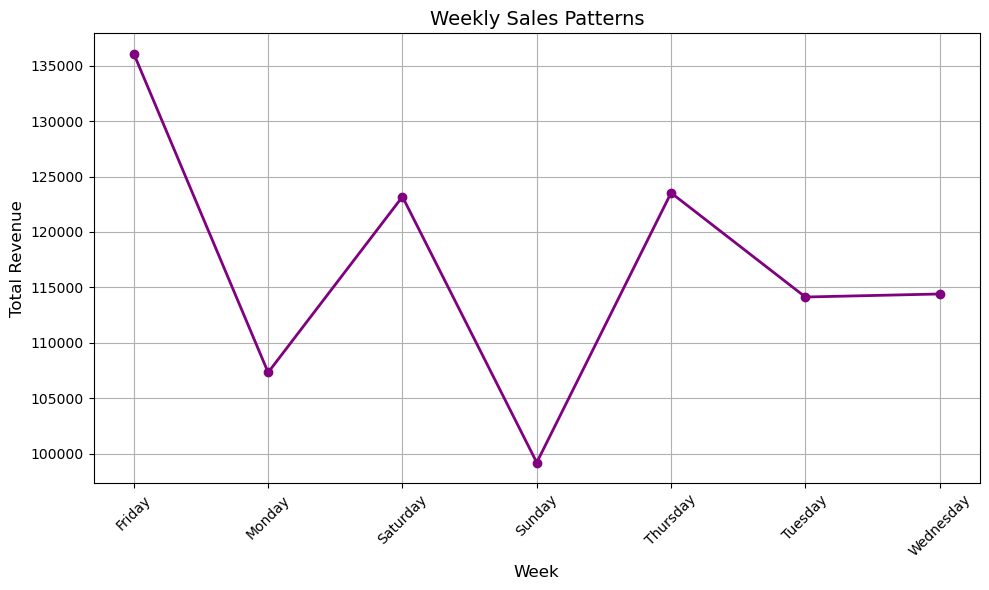

In [35]:
# Group by 'order_week' and calculate total revenue
sales_by_week = new_df.groupby('order_week').agg(total_revenue=('total_price', 'sum')).reset_index()

# Plotting Weekly Sales Patterns
plt.figure(figsize=(10, 6))
plt.plot(sales_by_week['order_week'], sales_by_week['total_revenue'], marker='o', color='purple', linestyle='-', linewidth=2, markersize=6)
plt.title('Weekly Sales Patterns', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(sales_by_week['order_week'], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Daily Sales Patterns:

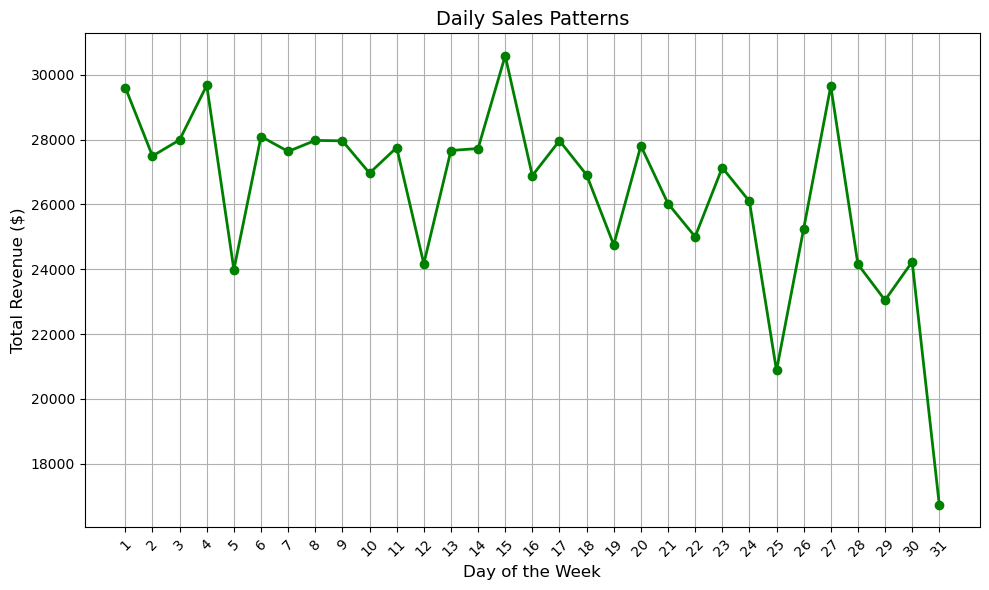

In [36]:
# Group by 'order_day' and calculate total revenue
sales_by_day = new_df.groupby('order_day').agg(total_revenue=('total_price', 'sum')).reset_index()

# Plotting Daily Sales Patterns
plt.figure(figsize=(10, 6))
plt.plot(sales_by_day['order_day'], sales_by_day['total_revenue'], marker='o', color='green', linestyle='-', linewidth=2, markersize=6)
plt.title('Daily Sales Patterns', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(sales_by_day['order_day'], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

## Sales by Hour of the Day

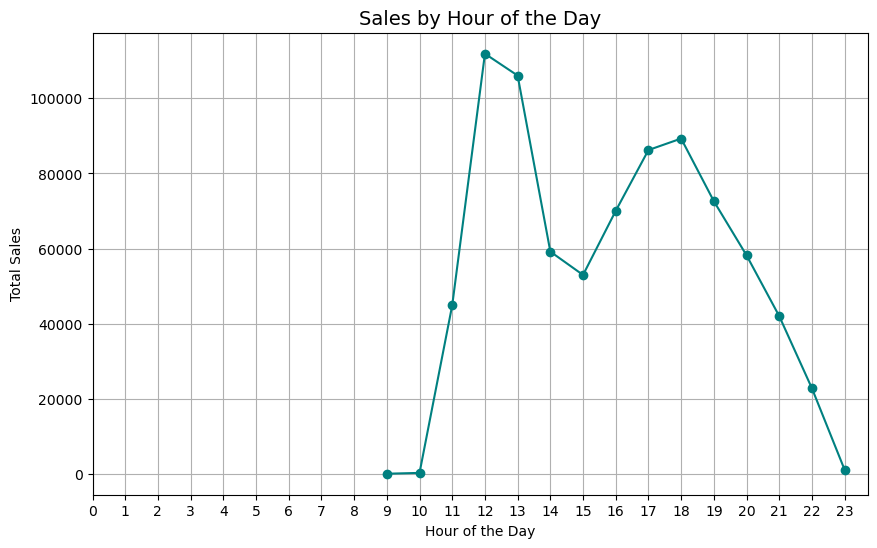

In [37]:
# Group by hour of the day to calculate total sales
sales_by_hour = new_df.groupby('order_hour')['total_price'].sum()

# Plot sales by hour
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', marker='o', color='teal')
plt.title('Sales by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(24))
plt.grid(True)
plt.show()

## Total Sales Over Time (Daily)

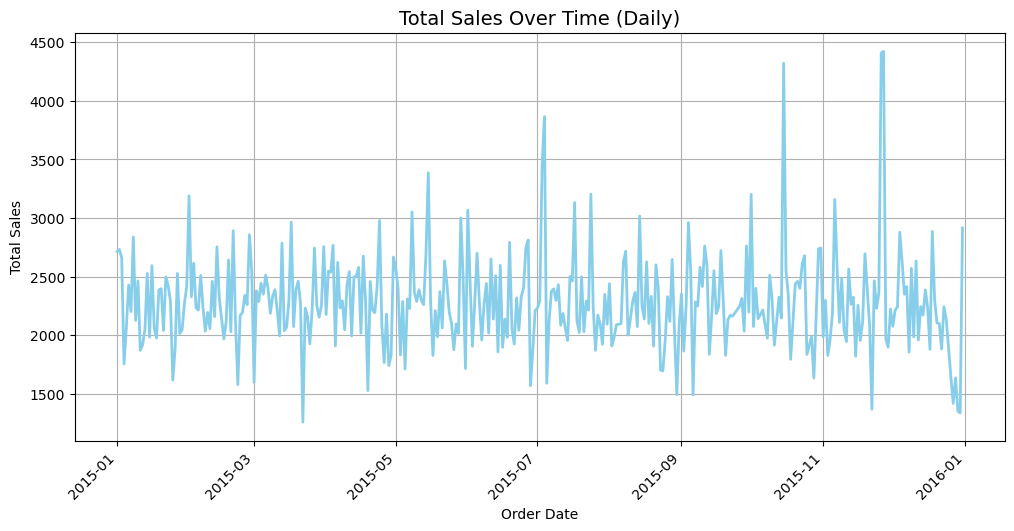

In [38]:
sales_by_date = df.groupby('order_date')['total_price'].sum()

# Plot total sales over time (daily)
plt.figure(figsize=(12, 6))
sales_by_date.plot(kind='line', color='skyblue', linewidth=2)
plt.title('Total Sales Over Time (Daily)', fontsize=14)
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Weekly Sales Heatmap

In [39]:
# Group by 'order_month_name' and 'order_week', summing 'total_price'
monthly_weekly_sales = new_df.groupby(['order_month_name', 'order_week'], observed=False)['total_price'].sum()

# Unstack to make it more readable (optional)
result = monthly_weekly_sales.unstack(fill_value=0)
result


order_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
order_month_name,,,,,,,
April,10618.00,9758.80,9686.70,7199.50,11706.05,8695.90,11071.85
August,10891.60,10526.10,11850.30,9248.30,8198.75,8440.25,9122.95
December,8398.65,8325.30,8535.35,8119.30,11163.40,9556.60,10602.55
February,11013.55,8661.30,9207.40,8945.40,8666.15,8987.75,9678.05
January,12147.40,8256.55,11897.55,7222.15,12079.00,9404.50,8786.15
July,14306.85,8849.40,10309.20,7671.35,11620.10,8456.30,11344.70
June,10377.70,12121.20,9663.35,7314.65,9317.75,11044.50,8391.05
March,10506.65,11496.65,8959.40,9268.80,8949.65,12560.80,8655.15
May,14646.70,8991.00,11980.80,9863.60,9002.30,7876.75,9041.60


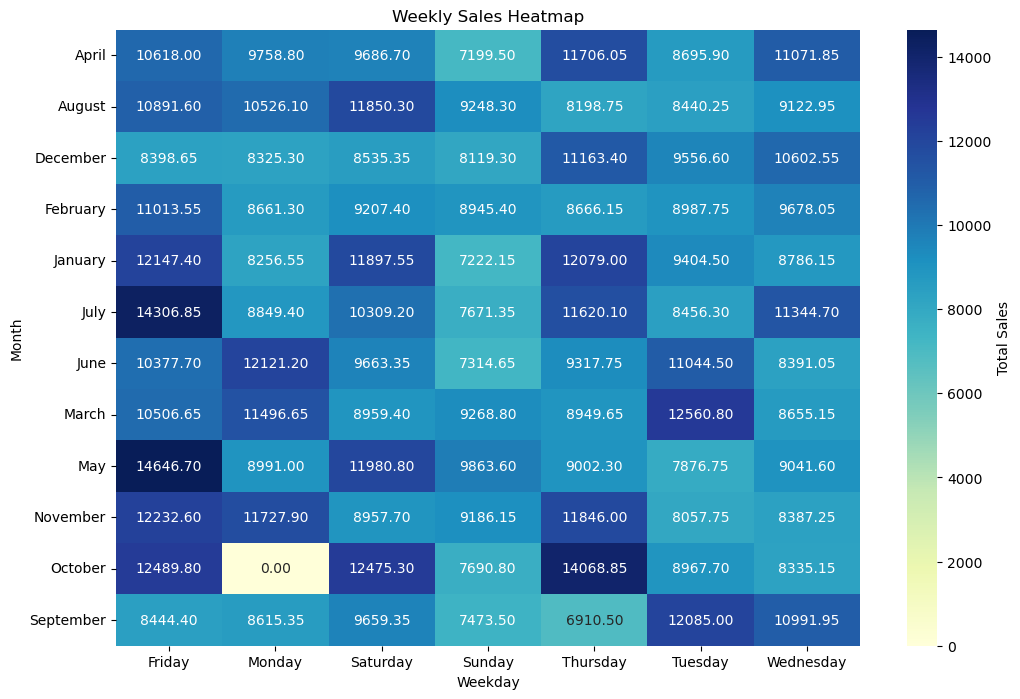

In [40]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(result, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Total Sales'})
plt.title("Weekly Sales Heatmap")
plt.xlabel("Weekday")
plt.ylabel("Month")
plt.show()


## Top 10 Most Common Pizza Ingredients

In [41]:
new_df['pizza_ingredients'].str.split(',', expand=True).stack().str.strip().value_counts()

Garlic                27422
Tomatoes              26601
Red Onions            19547
Red Peppers           16284
Mozzarella Cheese     10333
                      ...  
Brie Carre Cheese       480
Prosciutto              480
Caramelized Onions      480
Pears                   480
Thyme                   480
Name: count, Length: 65, dtype: int64

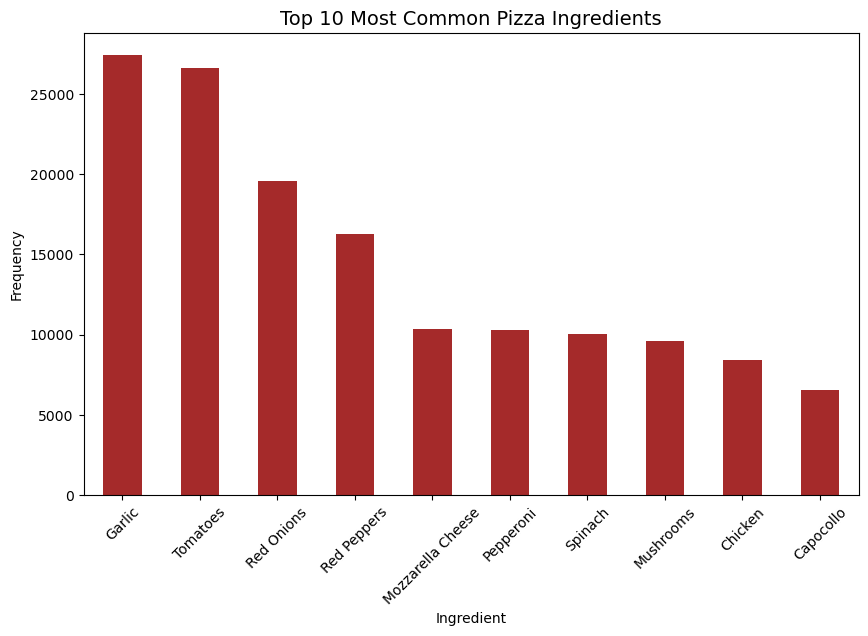

In [42]:
# Split ingredients and count the frequency of each ingredient
ingredient_counts = new_df['pizza_ingredients'].str.split(',', expand=True).stack().str.strip().value_counts()

# Plot top 10 ingredients
plt.figure(figsize=(10, 6))
ingredient_counts.head(10).plot(kind='bar', color='brown')
plt.title('Top 10 Most Common Pizza Ingredients', fontsize=14)
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## Top 10 Revenue-Generating Pizzas

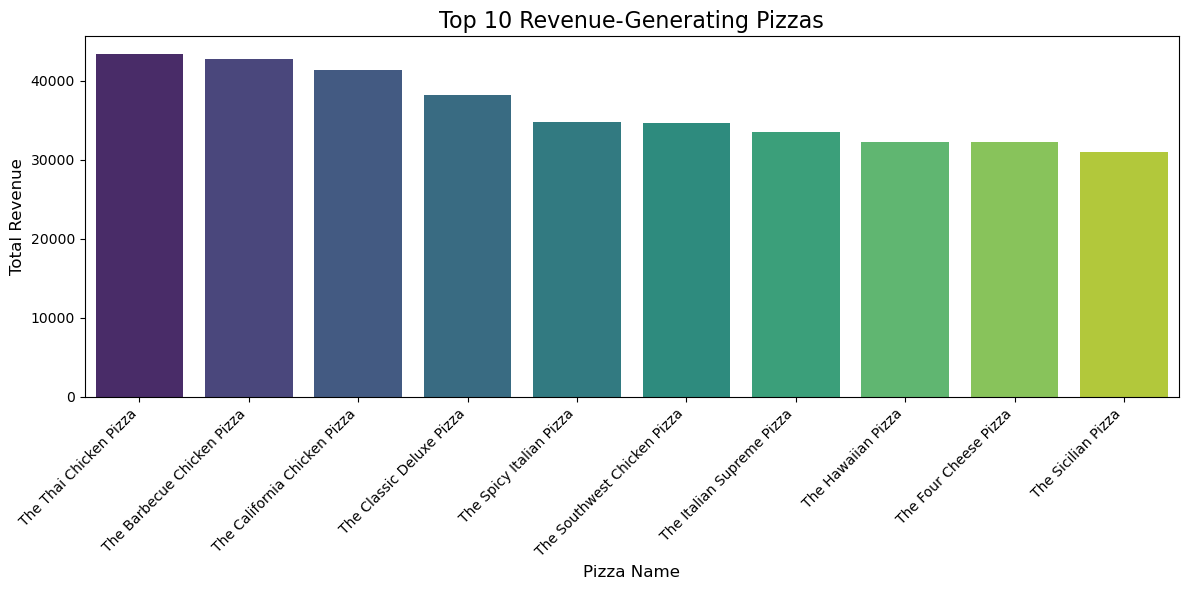

In [43]:
# Group by pizza name and calculate total revenue for each pizza
top_revenue_pizzas = df.groupby('pizza_name').agg(
    total_revenue=('total_price', 'sum')
).reset_index()

# Sort the pizzas by total revenue in descending order
top_revenue_pizzas = top_revenue_pizzas.sort_values(by='total_revenue', ascending=False)

# Select the top 10 revenue-generating pizzas for visualization
top_10_revenue_pizzas = top_revenue_pizzas.head(10)

# Plotting the top 10 revenue-generating pizzas
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_revenue_pizzas, x='pizza_name', y='total_revenue', hue='pizza_name', palette='viridis', legend=False)
plt.title('Top 10 Revenue-Generating Pizzas', fontsize=16)
plt.xlabel('Pizza Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()